### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Yield Curves

Yield curves are a snapshot of interest rates in that market—a simple yet often informative graph that plots yields to maturity on the vertical axis and times to maturity on the horizontal axis for a homogeneous set of securities.

The idea of any yield curve in principle is to display visually the relationship between interest rates on securities that are alike on all dimensions except maturity. Ideally, all the observations would be for securities that have the same credit risk, same liquidity, same periodicity, and same tax status. 

Most yield curves are based on government securities. That’s so we can hold constant all the listed factors other than time to maturity that impact investors’ required rates of return. The yields to maturity ideally would be for zero‐coupon securities so that coupon reinvestment risk is not a factor.

There is no perfect data set for term structure analysis. Typically seen yield curves are plots of street convention yields on coupon-bearing Treasury notes and bonds instead of yields on Treasury STRIPS. In particular, the yields displayed usually are for on‐the‐run issues (i.e., the most recently auctioned Treasury securities). These are actively traded and typically are priced close to par value, thereby minimizing the effects of the deferral for tax purposes of the gains and losses from buying at a discount or a premium. The problem is that there are gaps in the times to maturity, so some yields have to be interpolated.

### Forward Curve Intuition

Suppose that yields to maturity on 1‐year, 2‐year, and 3‐year zero‐coupon government bonds are 1.00%, 2.00%, and 2.50%, respectively (quoted on semiannual basis). These rates are *0y1y*, *0y2y*, *0y3*, (*0y* securities trade in the "cash market"). The first number is the starting date or read as "years ahead" and the second number is the tenor of the bond.

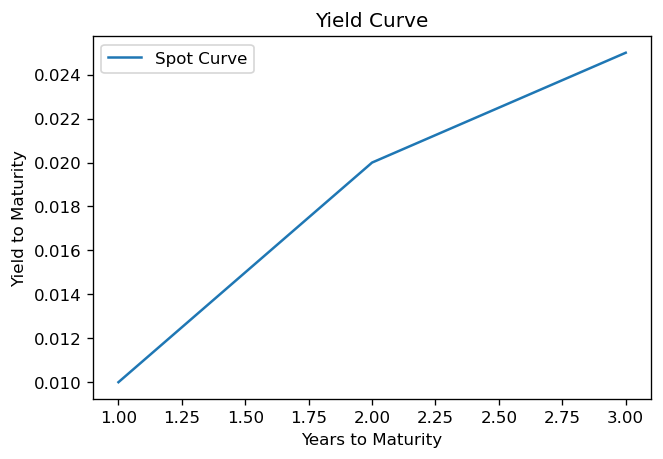

In [3]:
plt.figure(num=0, dpi=120)
plt.plot(np.array([1, 2, 3]), np.array([0.01, 0.02, 0.025]), label="Spot Curve")
plt.title('Yield Curve')
plt.xlabel('Years to Maturity')
plt.ylabel('Yield to Maturity')
plt.legend()

We can use the simple yield curve to infer the 1y1y, 1y2y, and 2y1y forward rates. These are implied yields on the 1-year bonds starting from one year and two years into the future (i.e. forward in time). 

At what rate must one be able to reinvest the proceeds of an investment in a shorter‐term bond to equal the proceeds of an investment in a longer‐term bond? The answer to this question is an Implied Forward Rate (IFR). 

Intuitively, the 1y1y IFR must be about 3.00% and the 2y1y IFR must be about 3.50% (ignore compounding for the this section). The idea is that if an investor can buy a 1‐year bond to yield 1.00% and reinvest for the second year at 3.00% (1y1y), the total return matches that of 2.00% per year on the 2‐year bond. Likewise, if an investor can buy the 2‐year at 2.00% and reinvest for the third year at 3.50% (2y1y), the same total return is obtained as on buying the 3‐year bond at 2.50%. Similarly, if a 1-year bond is purchased earning 1.00% for the first year and the proceeds are reinvested for the next two years at 3.25% per year (1y2y), the strategy produces the same return over the three years as buying the 3-year bond at an annual yield of 2.50%.

The simplified calculation (neglecting compounding) can be formalized as follows: let $Rate_{0yAy}$ be the shorter-term rate for the 0yAy time period, $Rate_{0yBy}$ for the longer-term rate for 0yBy period, and $Rate_{Ay(B-A)y}$ the implied forward rate starting from Ay for a tenor of B-Ay. 

$$Rate_{0yBy} \approx \left(\frac{AYears}{BYears}\times Rate_{0yAy}\right) + \left(\frac{BYears - A Years}{BYears}\times Rate_{Ay(B-A)y}\right)$$
$$Rate_{Ay(B-A)y} \approx \frac{BYears \times Rate_{0yBy} - AYears \times Rate_{0yAy}}{BYears-AYears}$$


The *longer‐term rate is a weighted average of the shorter‐term rate and the implied forward rate*, whereby the *weights are the shares of the overall time frame*.

In [5]:
def approx_ifr(short_rate, short_period, long_rate, long_period):
  return (long_period * long_rate - short_period * short_rate) / (long_period - short_period)

ifr_1y1y = approx_ifr(0.01, 1, 0.02, 2)
print(f'{ifr_1y1y = :0.2%}')
ifr_1y2y = approx_ifr(0.01, 1, 0.025, 3)
print(f'{ifr_1y2y = :0.2%}')
ifr_2y1y = approx_ifr(0.02, 2, 0.025, 3)
print(f'{ifr_2y1y = :0.2%}')

ifr_1y1y = 3.00%
ifr_1y2y = 3.25%
ifr_2y1y = 3.50%


The analogy of the implied forward rate is the same as the marginal cost (MC) and average cost (AC) in macroeconomics. The marginal cost curve intersects the average cost curve at its lowest point because the increasing marginal cost curve pulls the average cost down until the marginal cost increases past the average cost and begins to pull up the average cost curve, thus intersecting at the lowest point on the average cost curve.

Similarly, the buyer of a 2-year bond at 2.00% obtains an incremental, or marginal, return of 3.00% for the second year after earning 1.00% for the first year. The buyer of the 3‐year at 2.50% gets a marginal return of 3.50% for the third year after earning 2.00% for the first two years (or a 1‐year rate of 1.00% followed by 3.00%). This leads naturally to using the implied forward rate in **maturity choice decisions**. The issue will be how **one’s own expectation for a future rate compares to that priced into the forward curve**.

Consider an investor who has a known, certain 2‐year horizon and can buy any of these three zero‐coupon government bonds. The obvious strategy is to buy the 2‐year zero at 2.00% and lock in the rate of return (barring default on the government bond and neglecting inflation). But our investor might consider “riding the yield curve” and buy the 3‐year at 2.50%. The hope is that the yield at the time of sale is “low” (and the sale price is “high”). How low? Lower than 3.50%, the 2y1y IFR. The companion fear is that the yield is above 3.50%. Our investor might also consider buying the 1‐year at 1.00% and hope that rates rise for the second year. How high? Higher than 3.00%, the 1y1y implied forward rate. The risk is that the reinvestment rate is less than 3.00%. The forward curve is the benchmark for your hopes and fears.

### Implied Forward Curve

$$i_{t_{1},t_{2}}=\left[\frac{(1+i_{t_{0},t_{2}})^{t_{2}-t_{0}}}{(1+i_{t_{0},t_{1}})^{t_{1}-t_{0}}}\right]^{\frac{1}{(t_{2}-t_{1})}}-1$$

$$(1+i_{t_{0},t_{2}})^{t_{2}-t_{0}}=(1+i_{t_{0},t_{1}})^{t_{1}-t_{0}} (1+i_{t_{1},t_{2}})^{t_{2}-t_{1}}$$

$$\left(1+\frac{Rate_{t_{0},t_{1}}}{Per}\right)^{(t_{1}-t_{0})} \times \left(1+\frac{Rate_{t_{1},t_{2}}}{Per}\right)^{(t_{2}-t_{1})}  = \left(1+\frac{Rate_{t_{0},t_{2}}}{Per}\right)^{(t_{2}-t_{0})} $$

$t_{A},t_{B}$ or *AyBy* or *AmBy* mean: A years ahead (forward time period/starting period), B tenor of the underlying security

[FRED Reference](https://fredblog.stlouisfed.org/2023/05/constructing-forward-interest-rates-in-fred/)